## 2. Google+ network
***
In this part, we will explore the structure of the Google+ network. The dataset for creating the network can be found in the link below:

http://snap.stanford.edu/data/egonets-Gplus.html

Create directed personal networks for users who have more than 2 circles. The data required to create such personal networks can be found in the file named **gplus.tar.gz**.

### Packages
***

In [18]:
install.packages("igraph")


下載的二進位程式套件在
	/var/folders/tb/zk04m4k140x9t3mcflst2nmc0000gn/T//Rtmpi2VFj1/downloaded_packages 裡


In [2]:
library("igraph")
setwd("/Users/annie/Documents/UCLA/spring 2023/ECE232e/hw2/project2")

In [3]:
getwd()

[1] "/Users/annie/Documents/UCLA/spring 2023/ECE232e/hw2/project2"

#### QUESTION 18: How many personal networks are there?
> Ans:   
Once the directed personal networks for users who possess over two circles were formed, a sum of 57 personal networks were generated.

In [5]:
#18 original
file_names = list.files("gplus",pattern="*.circles")
ego_nodes = unique(file_names)
count = 0
for (file in ego_nodes){
  filename = paste("gplus/", file, sep="")
  circle_count = readLines(filename)
  if (length(circle_count)>2)
    count = count + 1
}
cat("number of personal networks with more than two circles :", count)

number of personal networks with more than two circles : 57

In [25]:
# #18 revise
# file_names <- list.files("gplus", pattern = "*.circles")
# ego_nodes <- unique(file_names)
# count <- sum(sapply(ego_nodes, function(file){
# filename <- paste("gplus/", file, sep="")
# circle_count <- readLines(filename)
# return(length(circle_count) > 2)
# }))
# cat("number of personal networks with more than two circles :", count)

number of personal networks with more than two circles : 57

In [6]:
#original
getel <- function(g,node){
    v = V(g)$name
    elist = c()
    for (i in 1 : (2*length(v))){
        if ( i%%2 == 0 ){
            elist[[i]] = v[[as.numeric(i/2)]]
        }else{
            elist[[i]] = node
        }
    }
    return(unlist(elist))

}

In [27]:
# #revise
# getel <- function(g, node) {
#   v <- V(g)$name
#   elist <- c()
#   for (i in seq_along(v)) {
#     elist <- c(elist, v[i], node)
#   }
#   return(elist)
# }


#### QUESTION 19: For the 3 personal networks (node ID given below), plot the in-degree and out-degree distribution of these personal networks. Do the personal networks have a similar in and out degree distribution? In this question, you should have 6 plots.
+ 109327480479767108490
+ 115625564993990145546
+ 101373961279443806744
> Ans:  
To determine the in and out degree of each graph, the ".edges" files were read using the "ncol" format. Subsequently, the ego node was added to the graphs after reading their edges. In accordance with the data configuration, the ego node follows every other node. Consequently, an edge list of the ego node was also created and added to the graph. The resulting in-degree and out-degree distributions of three nodes with specific IDs are presented below. It is evident that the in-degree distributions for the nodes differ significantly, whereas the out-degree distributions are quite similar.

modularity scores of personal network for node 109327480479767108490 0.2527806 


Warning message in xspline(cl$rescoords, shape = shape, open = FALSE, col = col, :
“此裝置不支援半透明：每一頁將被報告一次”


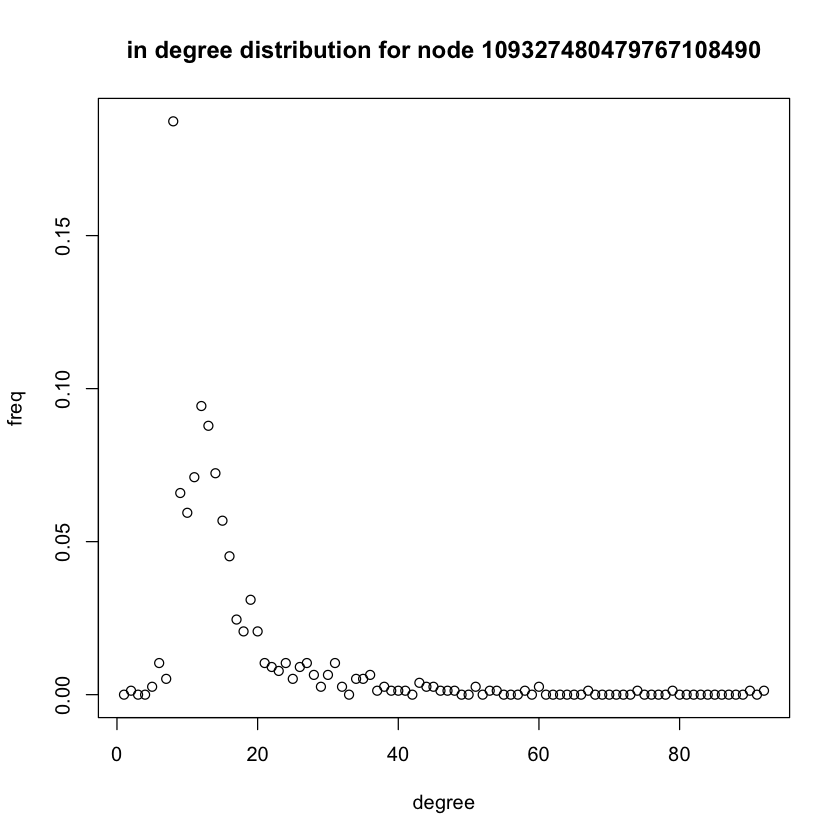

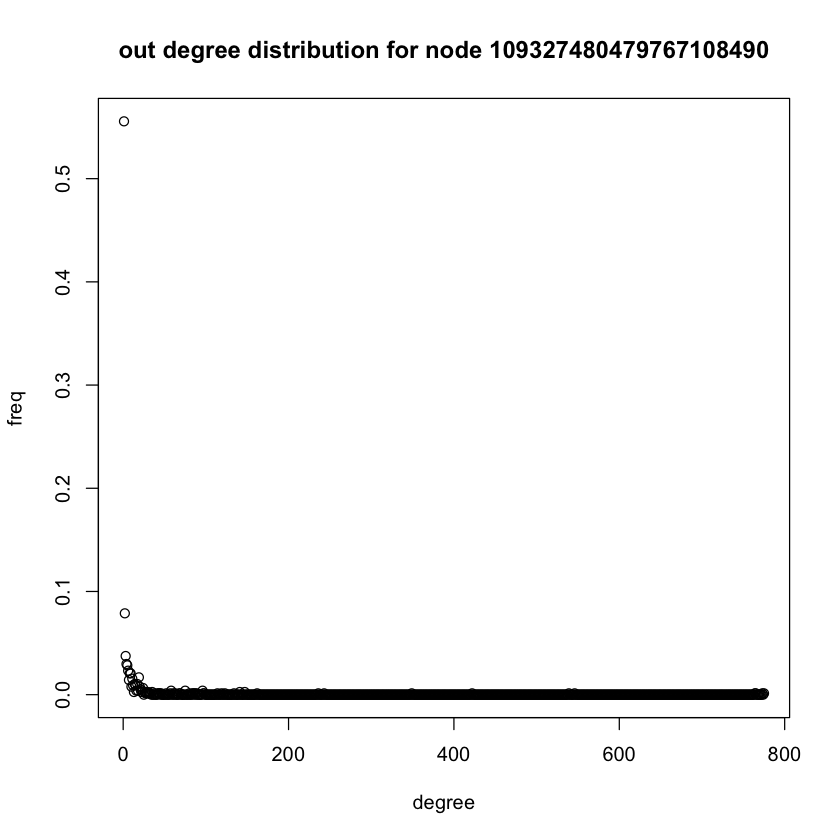

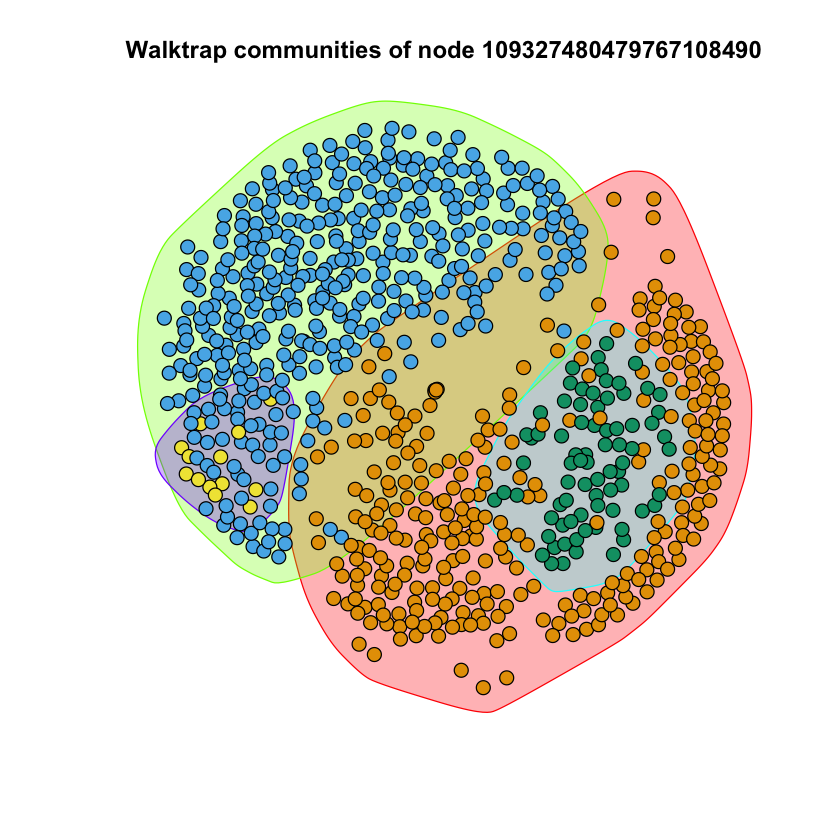

modularity scores of personal network for node 115625564993990145546 0.3194738 


Warning message in xspline(cl$rescoords, shape = shape, open = FALSE, col = col, :
“此裝置不支援半透明：每一頁將被報告一次”


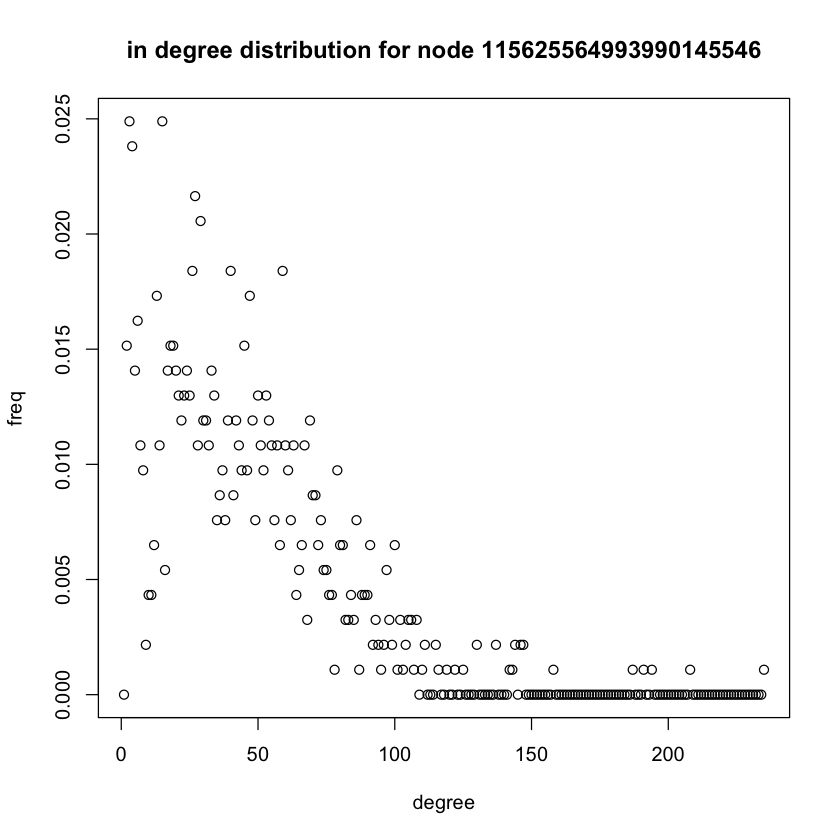

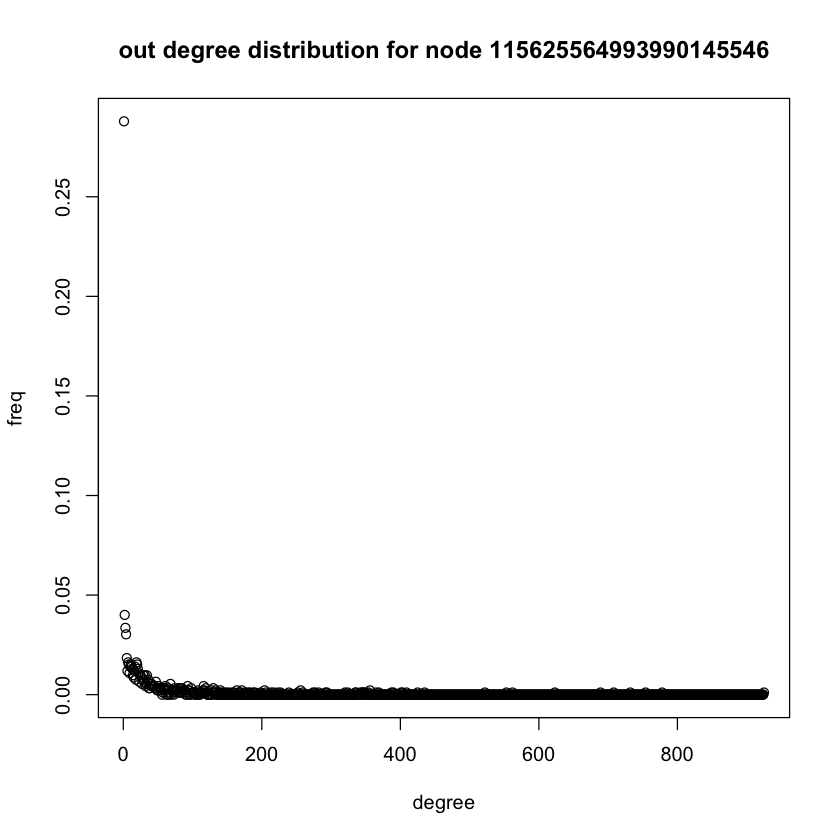

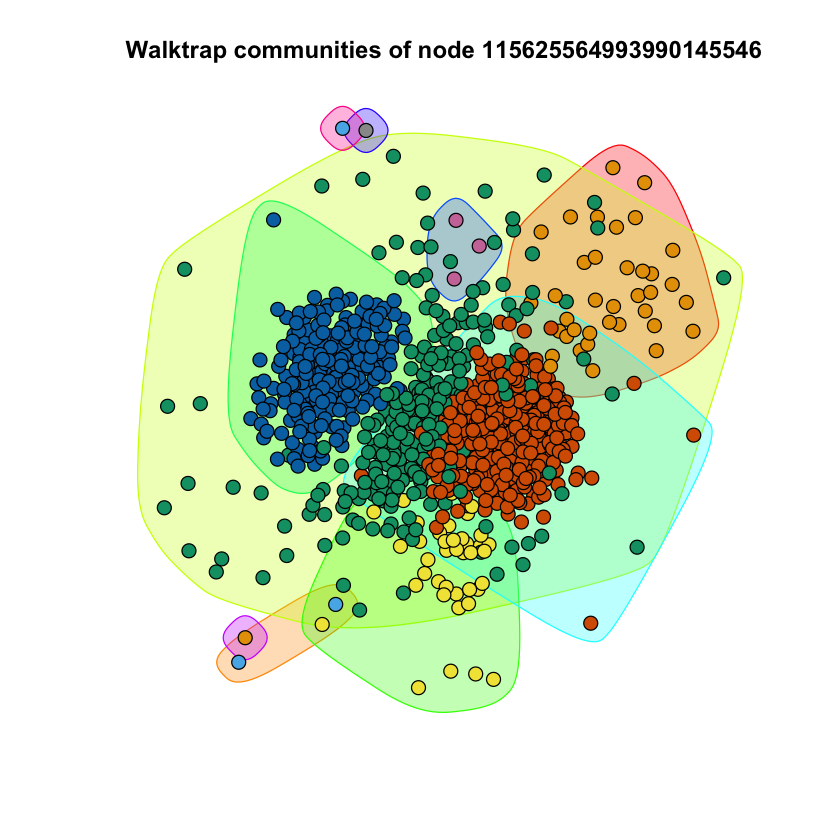

modularity scores of personal network for node 101373961279443806744 0.1910934 


Warning message in xspline(cl$rescoords, shape = shape, open = FALSE, col = col, :
“此裝置不支援半透明：每一頁將被報告一次”


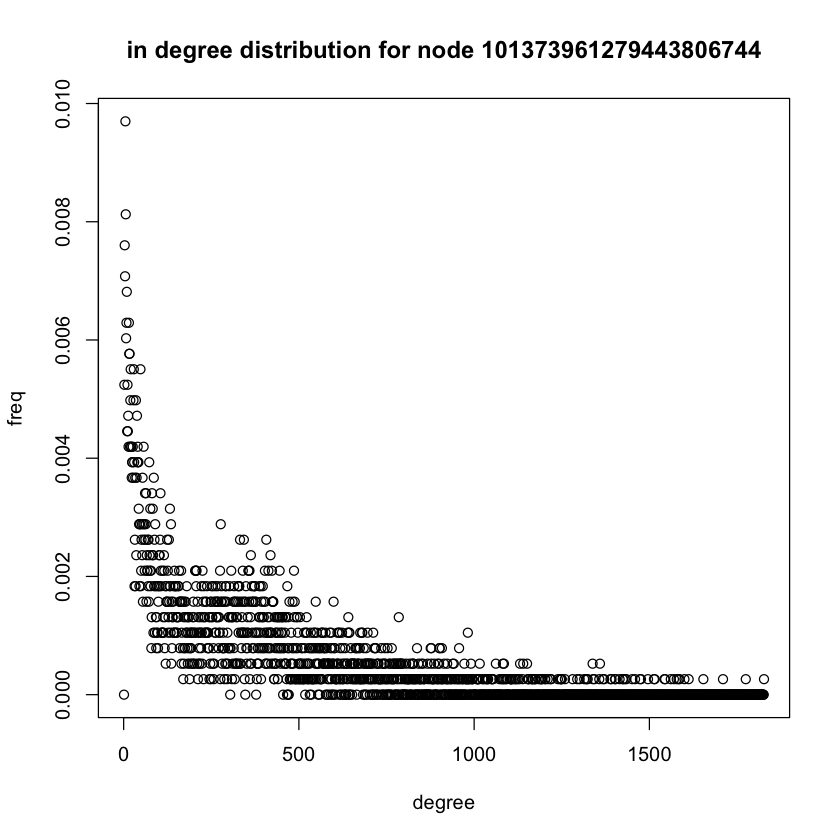

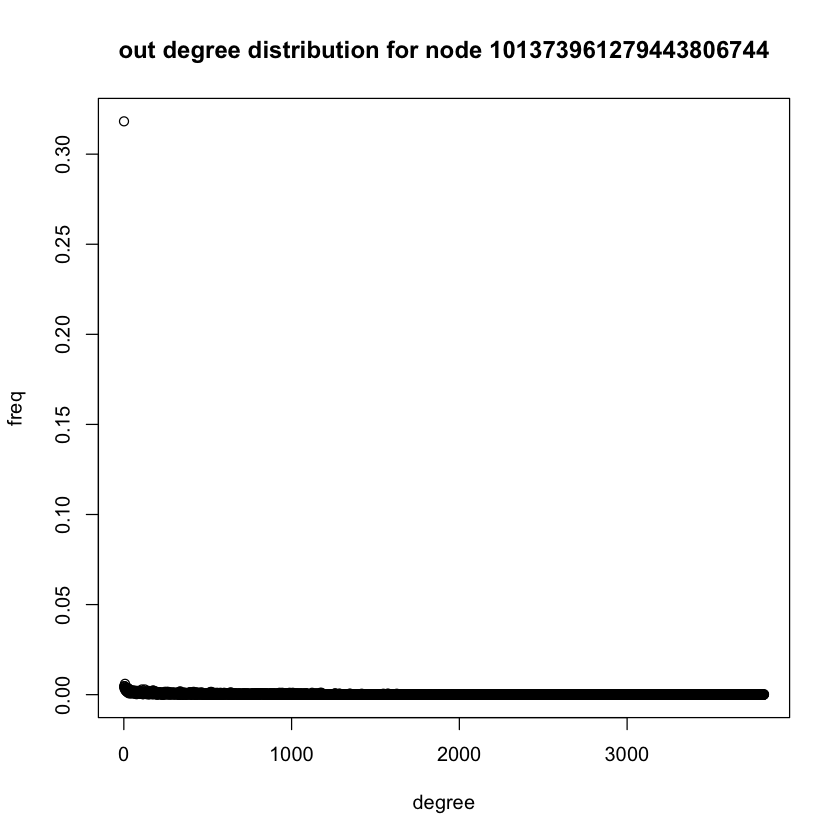

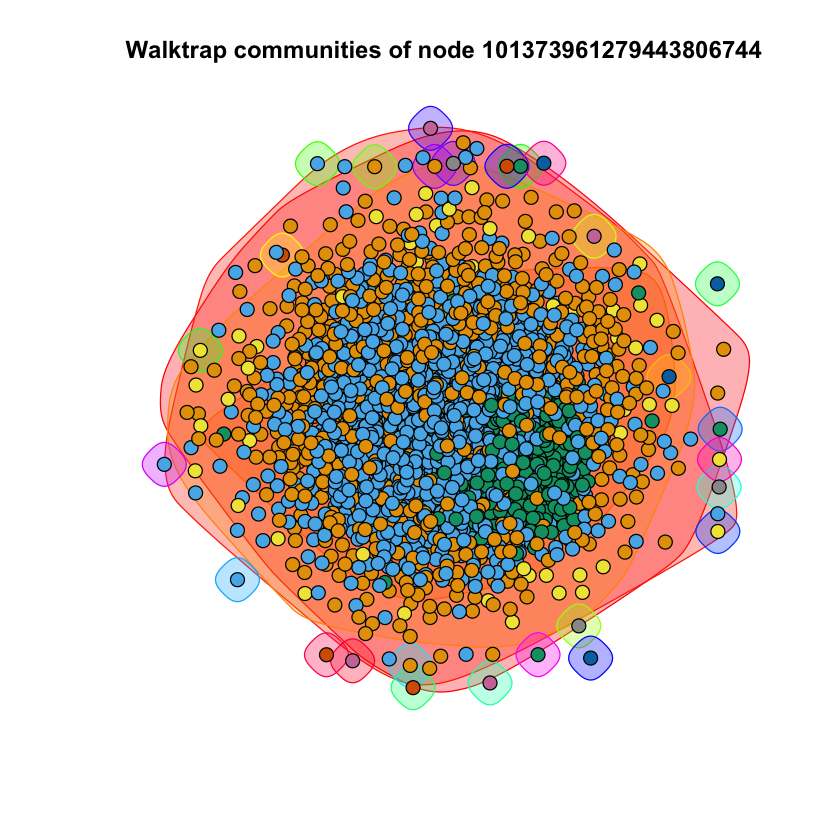

In [11]:
Node_idS = c("109327480479767108490", "115625564993990145546", "101373961279443806744")
for (i in 1:length(Node_idS)) {
  g = read_graph(paste("gplus/",Node_idS[i],'.edges',sep=""),format="ncol",directed=TRUE)
  g = g+ vertex(Node_idS[i])

  g = add_edges(g, getel(g,Node_idS[i]))
    
  d_in<-degree.distribution(g,mode="in")
  d_out<-degree.distribution(g,mode="out")
  plot(d_in,xlab="degree",ylab="freq",main=paste("in degree distribution for node ", Node_idS[i], sep=""))
  
  setEPS()
  postscript(paste("in_",i,'.eps',sep=""))
  plot(d_in,xlab="degree",ylab="freq",main=paste("in degree distribution for node ", Node_idS[i], sep=""))
  dev.off()
    
  plot(d_out,xlab="degree",ylab="freq",main=paste("out degree distribution for node ", Node_idS[i], sep=""))
  setEPS()
  postscript(paste("out_",i,'.eps',sep=""))
  plot(d_out,xlab="degree",ylab="freq",main=paste("out degree distribution for node ", Node_idS[i], sep=""))
  dev.off()
    
  walktrap_comm= walktrap.community(g)
  cat(paste("modularity scores of personal network for node ", Node_idS[i], sep=""), modularity(walktrap_comm),"\n")
    
  setEPS()
  postscript(paste("com_",i,'.eps',sep=""))
  plot(walktrap_comm,g, vertex.label=NA, vertex.size=5, edge.lty=0, edge.lable=NA, edge.arrow.mode = 0, main =paste("Walktrap communities of node ", Node_idS[i], sep=""))
  dev.off()
  plot(walktrap_comm,g, vertex.label=NA, vertex.size=5, edge.lty=0, edge.lable=NA, edge.arrow.mode = 0, main =paste("Walktrap communities of node ", Node_idS[i], sep=""))
  }

### 1. Community structure of personal networks
***
In this part of the project, we will explore the community structure of the personal networks that we created and explore the connections between communities and user circles.

#### QUESTION 20: For the 3 personal networks picked in Question 19, extract the community structure of each personal network using Walktrap community detection algorithm. Report the modularity scores and plot the communities using colors. Are the modularity scores similar? In this question, you should have 3 plots.
> Ans:  
The Walktrap community detection algorithm was utilized to extract the community structure for each ego graph, as illustrated in Q19 above. In order to render the intricate community structures, a transparent background was used.

>  In terms of modularity, the scores for three personal networks were obtained and reported as follows:  
1 ) The modularity score of the personal network for node 109327480479767108490 is 0.2527806.  
2 ) The modularity score of the personal network for node 115625564993990145546 is 0.3194738.  
3 ) The modularity score of the personal network for node 101373961279443806744 is 0.1910934.   
We found that the more interconnected the nodes are in a community, the higher the modularity score. The similar modularity scores for the first and second graphs suggest that the nodes within each community are connected in a similar manner. Furthermore, we can observe that the third graph, despite being larger in size, is actually less densely connected, resulting in a lower modularity score.

Having found the communities, now we will explore the relationship between circles and communities. In order to explore the relationship, we define two measures:
+ Homogeneity
+ Completeness

Before, we state the expression for homogeneity and completeness, let’s introduce some notation:
+ C is the set of circles, C = {C1, C2, C3, · · · }
+ K is the set of communities, K = {K1, K2, K3, · · · }
+ ai is the number of people in circle Ci
+ bi is the number of people in community Ki with circle information
+ N is the total number of people with circle information
+ Aji is the number of people belonging to community j and circle i

Then, with the above notation, we have the following expressions for the entropy
$$
H(C)=-\sum_{i=1}^{|C|}\frac{a_i}{N}\log\frac{a_i}{N}
$$
$$
H(K)=-\sum_{i=1}^{|K|}\frac{b_i}{N}\log\frac{b_i}{N}
$$
and conditional entropy
$$
H(C|K) = −\sum_{j=1}^{|K|}\sum_{i=1}^{|C|}\frac{A_{ji}}{N}\log\frac{A_{ji}}{b_j}
$$
$$
H(K|C) = −\sum_{i=1}^{|C|}\sum_{j=1}^{|K|}\frac{A_{ji}}{N}\log\frac{A_{ji}}{a_i}
$$
Now we can state the expression for homogeneity, h as
$$
h = 1 − \frac{H(C|K)}{H(C)}
$$
and the expression for completeness, c as
$$
c = 1 − \frac{H(K|C)}{H(K)}
$$

#### QUESTION 21: Based on the expression for h and c, explain the meaning of homogeneity and completeness in words.
> Ans:   
The homogeneity score measures the extent to which each community consists of members from a single circle. If the homogeneity score is high, it means that the communities are highly homogenous, i.e., each community is made up of members from a single circle. On the other hand, if the homogeneity score is low, it means that the communities are heterogeneous, i.e., each community contains members from different circles.  
The completeness score measures how well the communities cover all the members of each circle. A high completeness score indicates that all members of a given circle are assigned to the same community, even though a community may contain a subset of members from different circles. A low completeness score means that the members of a given circle are split across different communities, making it difficult to determine which community the members belong to.

#### QUESTION 22: Compute the h and c values for the community structures of the 3 personal network (same nodes as Question 19). Interpret the values and provide a detailed explanation. Are there negative values? Why?
> Ans: 

The table presented below displays the corresponding homogeneity and completeness scores.

| Node ID           | 109327480479767108490 | 115625564993990145546 | 101373961279443806744 |
| :---------------- | :------: | :----: | :----: |
| Homogeneity       |   0.5249326   | 0.1060277 | 0.0003744895 |
| Completeness      |   0.5497246   | 0.3821831 | 0.0008590604 |

For the first node, 109327480479767108490, both the homogeneity and completeness scores are relatively high, indicating that the number of communities and circles are relatively small. This suggests that each community contains members from only a few circles, and members of the same circle are more likely to be grouped together in one community.

For the second node, 115625564993990145546, the homogeneity score is lower than the completeness score. A low homogeneity score implies that each community is large and can contain members from different circles, while the high completeness score indicates that the number of communities might not be high and members from each circle are not spread out to different communities.

For the third node, 101373961279443806744, both the homogeneity and completeness scores are very small. This suggests that the graph for this node is relatively large and contains more circles/communities. Each community is large and can contain members from different circles, and the members of a circle are more likely to be spread around since there are more communities to choose from.

There are no negative values in the results. As for the reason why there are no negative values, it is because the mathematical formula used to calculate the scores involves logarithms of probabilities, which are always non-negative. The logarithm of a probability less than 1 is negative, but when it is multiplied by the probability itself, the result is still non-negative. Therefore, it is impossible for the homogeneity and completeness scores to be negative.

In [58]:
HandC <- function(id) {
  g <- read.graph(paste0("gplus/", id, ".edges"), format = "ncol", directed = TRUE)
  g <- g + vertices(id)
  g <- add_edges(g, getel(g, id))
  community <- walktrap.community(g)

  filename <- paste0("gplus/", id, ".circles")
  circle_count <- readLines(filename)
  circles <- strsplit(circle_count, "[[:space:]]+")

  number_cir <- length(circles)
  number_com <- length(community)

  circlelist <- list()
  for (i in 1:number_cir) {
    cicle_mem <- unlist(circles[i])[-1]
    circlelist[[i]] <- cicle_mem
  }

  ai <- numeric(length = number_cir)
  for (i in 1:length(circlelist)) {
    ai[[i]] <- length(circlelist[[i]])
  }

  total_membership <- membership(community)

  b_frame <- as.data.frame(table(total_membership[unlist(circlelist)]))

  bi <- numeric(length = number_com)
  indices <- c()
  for (i in b_frame[[1]]) {
    indices <- c(indices, as.numeric(i))
  }
  bi[indices] <- b_frame[[2]]

  N <- sum(ai)
  p_ai <- ai / N
  p_bi <- bi / N

  hk <- 0
  for (j in seq(1, number_com)) {
    if (p_bi[j] == 0) {
      next
    }
    hk <- hk + p_bi[j] * log(p_bi[j])
  }

  A_Matrix <- matrix(0, nrow = number_cir, ncol = number_com)

  for (i in seq(1, number_cir)) {

    community_vector <- numeric(length = number_com)
    sub_membership <- total_membership[circlelist[[i]]]
    sub_membership <- as.data.frame(table(sub_membership))
    indices <- c()
    for (j in sub_membership[[1]]) {
      indices <- c(indices, as.numeric(j))
    }

    community_vector[indices] <- sub_membership[[2]]
    A_Matrix[i, ] <- community_vector
  }

  H_C <- -sum(p_ai * log(p_ai))
  H_K <- -hk
  H_CK <- 0
  H_KC <- 0

  for (j in seq(1, number_com)) {
    for (i in seq(1, number_cir)) {
      if (A_Matrix[i, j] == 0) {
        next
      }
      H_CK <- H_CK + A_Matrix[i, j] / N * log(A_Matrix[i, j] / bi[j])
      H_KC <- H_KC + A_Matrix[i, j] / N * log(A_Matrix[i, j] / ai[i])
    }
  }

  h <- 1 + H_CK / H_C
  c <- 1 + H_KC / H_K
  cat('The homogeneity score for node ', id,' is ',h,'\n')
  cat('The completeness score for node ', id,' is ',c,'\n')
  Result <- c(h,c)
  return(Result)
}

Node_idS <- c("109327480479767108490", "115625564993990145546", "101373961279443806744")
scores <- lapply(Node_idS, function(x) HandC(x))


The homogeneity score for node  109327480479767108490  is  0.5249326 
The completeness score for node  109327480479767108490  is  0.5497246 
The homogeneity score for node  115625564993990145546  is  0.1060277 
The completeness score for node  115625564993990145546  is  0.3821831 
The homogeneity score for node  101373961279443806744  is  0.0003744895 
The completeness score for node  101373961279443806744  is  0.0008590604 
